##### Importing libraries...

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

With %matplotlib inline enabled, the plot generated by plt.plot() would appear directly in your Jupyter Notebook or IPython environment, typically below the code cell.

###### Importing Ipl dataset...

In [4]:
df = pd.read_csv("ipl data.csv")

In [5]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


###### How big is the dataset?

In [6]:
df.shape

(756, 18)

The dataset has 756 rows of data in 18 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

###### Name of all the columns...

In [8]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

#### Data Preprocessing...

###### Finding out NaN values

In [9]:
df.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

 Computing the count of missing values for each column...

In [10]:
missing_values = df.isna().sum()
print(missing_values)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [11]:
# Using boolean indexing to retrieve columns with missing values

columns_with_null = missing_values[missing_values > 0]
print("Columns with Missing Values:\n",columns_with_null)


Columns with Missing Values:
 city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


##### Statistical Description of dataset

In [12]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


##### How many matches were played according to the dataset?

In [13]:
df['id'].count()

756

##### How many seasons are we using to analyze?

In [19]:
unique_seasons = df['season'].unique()
print(unique_seasons)

[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


In [18]:
len(unique_seasons)

12

We have 12 seasons of data.

##### Which team won by  maximum runs?

In [16]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

.idxmax() is a Pandas DataFrame function which calculates and returns the index (or row label) of the first occurrence of the maximum value in that column. 

##### Which team won by taking maximum wickets?

In [18]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

##### Which team won by taking minimum wickets?

In [19]:
df.iloc[df['win_by_wickets'].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

##### Which season consisted of the highest number of matches played?

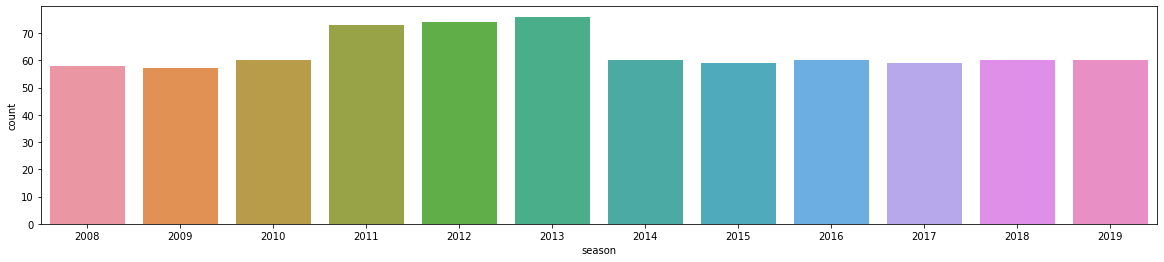

In [20]:
fig_dims = (20,4)
fig, ax = plt.subplots(figsize= fig_dims)
sns.countplot(x='season', ax=ax, data=df)
plt.show()

fig_dims = (20, 4): This line defines a tuple called fig_dims with two values, where the first value (20) represents the width, and the second value (4) represents the height. This tuple is used to set the dimensions of the figure (the entire plotting area) where the countplot will be displayed. In this case, the figure will be 20 units wide and 4 units high.
    

plt.subplots a matplotlib function used to create a new figure and a set of subplots within that figure. It returns two objects, fig (the figure) and ax (an axis or a set of axes).


figsize=fig_dims: The figsize parameter is set to the fig_dims tuple, which determines the width and height of the entire figure.

    
x='season' is the variable to be plotted on the x-axis of the countplot.

ax=ax specifies the axis (or subplot) where the countplot will be drawn. The ax variable holds the subplot created earlier with the specified dimensions.

##### Which team has won the most number of matches across all seasons?

<AxesSubplot:xlabel='winner'>

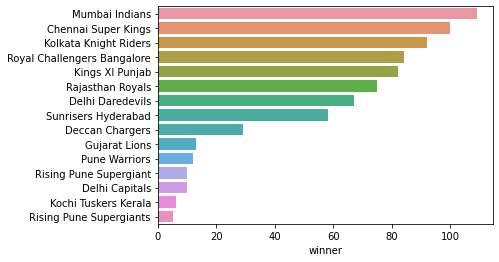

In [25]:
df1 = df.winner.value_counts()
sns.barplot(y=df1.index, x=df1)

 y=df1.index: This specifies that the values on the y-axis of the bar plot should be taken from the index of the 'df1' Series. In this case, it represents the unique team names.

    
x=df1: This specifies that the values on the x-axis of the bar plot should be taken from the 'df1' Series, which contains the counts of how many times each team won.

### Analysing the teams batting first

#### Extracting the teams who won batting first

In [12]:
batting_first=df[df['win_by_runs']!=0]

In [14]:
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


#### Checking the distribution of runs margin for matches won by batting first

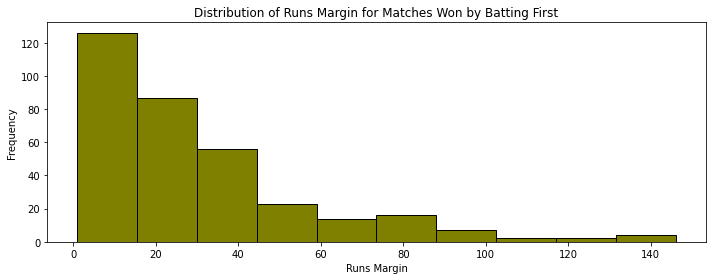

In [45]:
# Creating a histogram for the 'win_by_runs' column

plt.figure(figsize=(10, 4))
plt.hist(batting_first['win_by_runs'], bins=10, edgecolor='black', color='olive')

# Customize the plot
plt.title("Distribution of Runs Margin for Matches Won by Batting First")
plt.xlabel("Runs Margin")
plt.ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()

#### Teams batting first and winning

In [18]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

##### Top 5 Winning Teams batting first

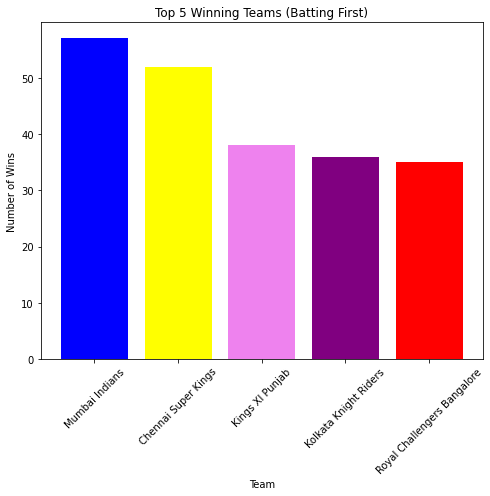

In [23]:
# Create a bar plot for the top 5 winners
plt.figure(figsize=(7, 7))
top_5_winners = batting_first['winner'].value_counts().head(5)
colors = ["blue", "yellow", "violet", "purple", "red"]  # Define custom colors

plt.bar(top_5_winners.index, top_5_winners.values, color=colors)

# Customize the plot
plt.title("Top 5 Winning Teams (Batting First)")
plt.xlabel("Team")
plt.ylabel("Number of Wins")

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 5 Winning Teams bating first

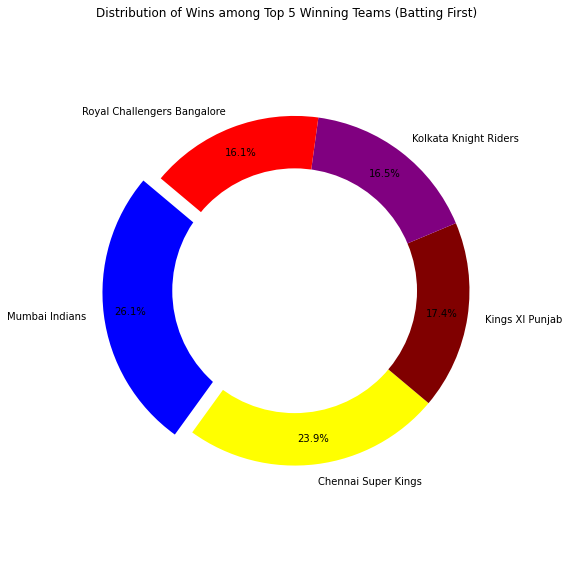

"\nA pie chart is created using plt.pie() with custom colors, labels, and additional formatting options.\n\nThe autopct parameter specifies that percentage labels should be displayed on the chart.\n\nThe startangle parameter specifies the angle at which the pie chart starts.\n\npctdistance controls the distance of the percentage labels from the center of the chart.\n\nAn optional step adds a white circle to the center to make it look like a donut chart.\n\nCustomizations are applied to the plot, including the title.\n\nThe plt.axis('equal') ensures that the pie chart is drawn as a circle."

In [24]:
top_5_winners = batting_first['winner'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ["blue", "yellow", "maroon", "purple", "red"]  # Define custom colors

# Explode a slice for emphasis 
explode = (0.1, 0, 0, 0, 0)

plt.pie(top_5_winners, labels=top_5_winners.index, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customize the plot
plt.title("Distribution of Wins among Top 5 Winning Teams (Batting First)")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

"""
A pie chart is created using plt.pie() with custom colors, labels, and additional formatting options.

The autopct parameter specifies that percentage labels should be displayed on the chart.

The startangle parameter specifies the angle at which the pie chart starts.

pctdistance controls the distance of the percentage labels from the center of the chart.

An optional step adds a white circle to the center to make it look like a donut chart.

Customizations are applied to the plot, including the title.

The plt.axis('equal') ensures that the pie chart is drawn as a circle."""



### How has the teams performed batting second?

In [25]:
batting_Second = df[df['win_by_wickets']!=0]

Making a histogram for frequency of win w.r.t number of wickets

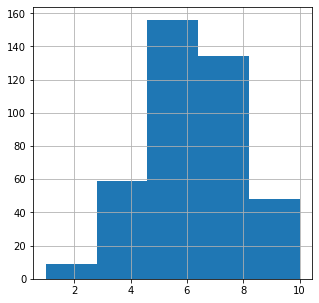

In [28]:
plt.figure(figsize=(5,5))
plt.hist(batting_Second['win_by_wickets'],bins=5)

plt.grid(True)
plt.show()

In [30]:
batting_Second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

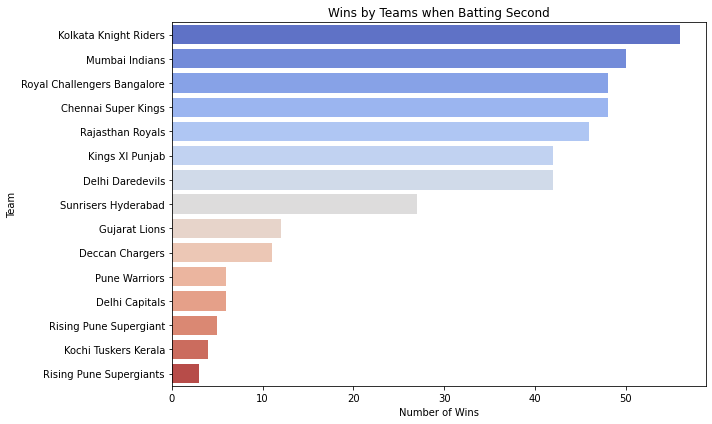

In [31]:
# Calculate the count of wins when batting second
wins_when_batting_second = batting_Second['winner'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=wins_when_batting_second.values, y=wins_when_batting_second.index, palette="coolwarm")

# Customize the plot
plt.title("Wins by Teams when Batting Second")
plt.xlabel("Number of Wins")
plt.ylabel("Team")

# Show the plot
plt.tight_layout()
plt.show()


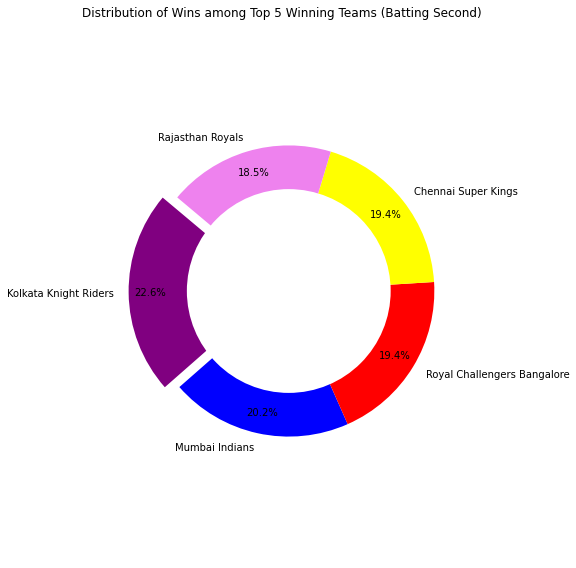

In [33]:
# Get the top 5 winning teams when batting second
top_5_winners_batting_second = batting_Second['winner'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ["purple", "blue", "red", "yellow", "violet"]  # Define custom colors

# Explode a slice for emphasis (optional)
explode = (0.1, 0, 0, 0, 0)

plt.pie(top_5_winners_batting_second, labels=top_5_winners_batting_second.index, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customize the plot
plt.title("Distribution of Wins among Top 5 Winning Teams (Batting Second)")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


#### No. of matches per season

In [34]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

##### What is the probability of winning a match if the toss is won?

In [26]:
probability_of_win = df['toss_winner']==df['winner']

probability_of_win.groupby(probability_of_win).size()


False    363
True     393
dtype: int64

C:\Users\santa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

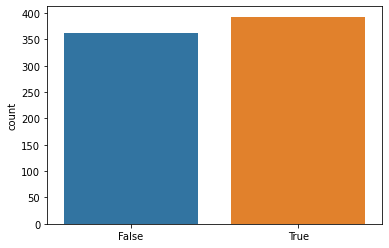

In [27]:
sns.countplot(probability_of_win)

##### How many times has a team won the match after winning the toss?

In [36]:
# Creating a new DataFrame with matches where the toss winner also won the match
toss_winner_and_match_winner = df[df['toss_winner'] == df['winner']]

# Calculating the count of such wins for each team
team_wins_after_toss_win = toss_winner_and_match_winner['winner'].value_counts()

# Reset the index to have a DataFrame with 'Team' and 'Wins' columns
team_wins_after_toss_win = team_wins_after_toss_win.reset_index()
team_wins_after_toss_win.columns = ['Team', 'Wins']

team_wins_after_toss_win

,Team,Wins
0,Chennai Super Kings,57
1,Mumbai Indians,56
2,Kolkata Knight Riders,53
3,Rajasthan Royals,42
4,Royal Challengers Bangalore,41
5,Kings XI Punjab,35
6,Delhi Daredevils,35
7,Sunrisers Hyderabad,23
8,Deccan Chargers,19
9,Gujarat Lions,10


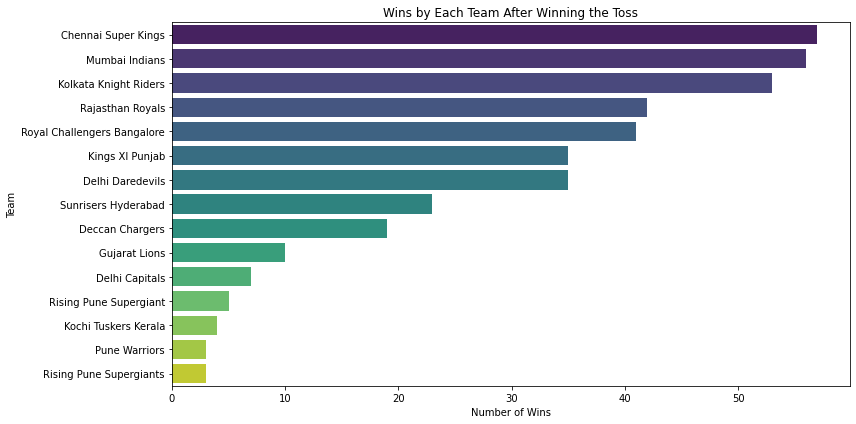

In [37]:
# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Wins', y='Team', data=team_wins_after_toss_win, palette='viridis')

# Customizing the plot
plt.title("Wins by Each Team After Winning the Toss")
plt.xlabel("Number of Wins")
plt.ylabel("Team")

# Show the plot
plt.tight_layout()
plt.show()

##### Highest wins by team per season

In [28]:
df.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

How to display all the values?

In [29]:
# Set display options to show all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [30]:
df.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

##### Did the teams chose to bat or field after winning the toss?

In [27]:
df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

Season-wise analysis

In [32]:
df.groupby('season')['toss_decision'].value_counts()

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            50
        bat              10
Name: toss_decision, dtype: int64

In [35]:
df.groupby(['season', 'toss_decision'])['toss_decision'].count().unstack().fillna(0)

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


In [33]:
# Grouping the data by 'season' and 'toss_decision' and count occurrences

toss_decision_counts = df.groupby(['season', 'toss_decision'])['toss_decision'].count().unstack().fillna(0)

It first groups the data by both 'season' and 'toss_decision' and counts the occurrences of each combination using unstack() to pivot the data.

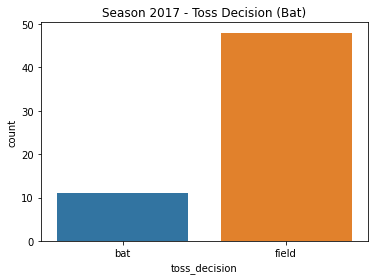

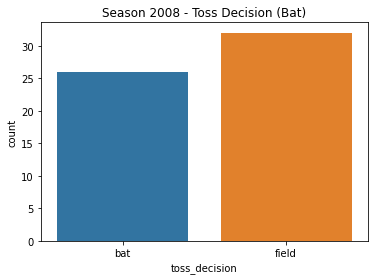

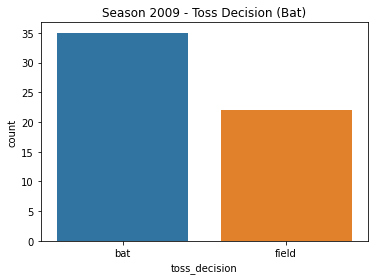

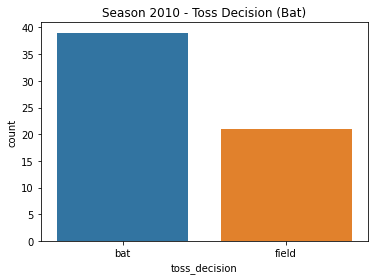

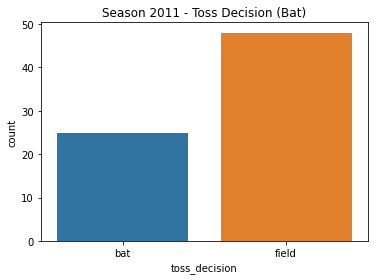

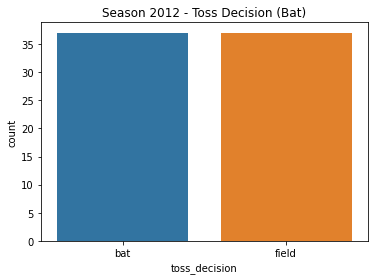

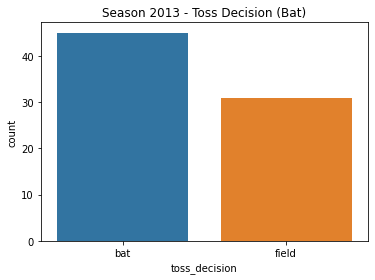

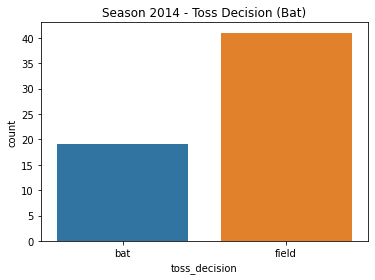

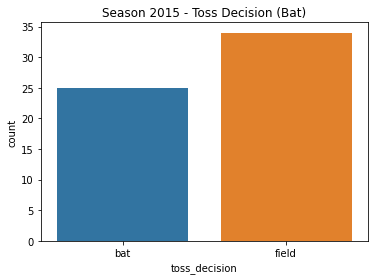

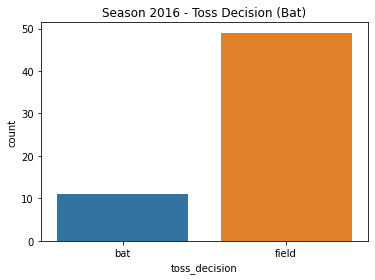

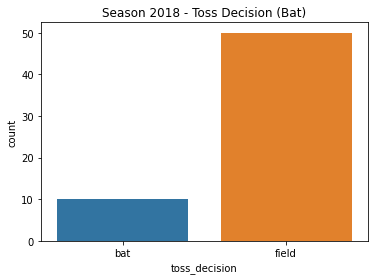

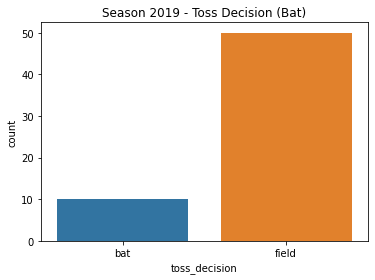

In [41]:
# Plot each season separately
for season in df['season'].unique():
    plt.figure(figsize=(10, 4)) 
    
# Create two subplots for "bat" and "field"
    plt.subplot(1, 2, 1)
    sns.countplot(data=df[df['season'] == season], x='toss_decision', order=['bat', 'field'])
    plt.title(f'Season {season} - Toss Decision (Bat)')
    
    
    plt.tight_layout()
    plt.show()

##### Man of the match

In [28]:
df['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [38]:
Top5=df['player_of_match'].value_counts()[:5]
Top5

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

##### Number of matches played per city

In [32]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64